In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gspec

# Import and Assess

In [23]:
df = pd.read_csv("./data/Dataset.csv", sep=";")
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.describe(include="all")

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,111733,107561.000000,111733.000000,111733,110732,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
unique,NaN,199,NaN,NaN,107584,103480,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FRA,NaN,NaN,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16516,NaN,NaN,75,3032,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,55867.000000,NaN,45.639191,595.026599,NaN,NaN,60.833147,283.851283,64.682802,0.002282,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,NaN,17.244952,374.657382,NaN,NaN,85.115320,379.131556,123.580715,0.080631,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,NaN,-10.000000,36.000000,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,NaN,33.000000,288.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,NaN,47.000000,522.000000,NaN,NaN,21.000000,208.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,NaN,58.000000,889.000000,NaN,NaN,95.000000,393.300000,84.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
df.shape

(111733, 29)

In [26]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

# Exploratory Data Analysis

In [73]:
# data
metric_df = df.loc[:, (df.dtypes!="object") & (~df.columns.str.contains("SR"))]
metric_df_hue = df.loc[:,(~df.columns.str.contains("Hash")) & (~df.columns.str.contains("SR"))].drop("ID",1).dropna()

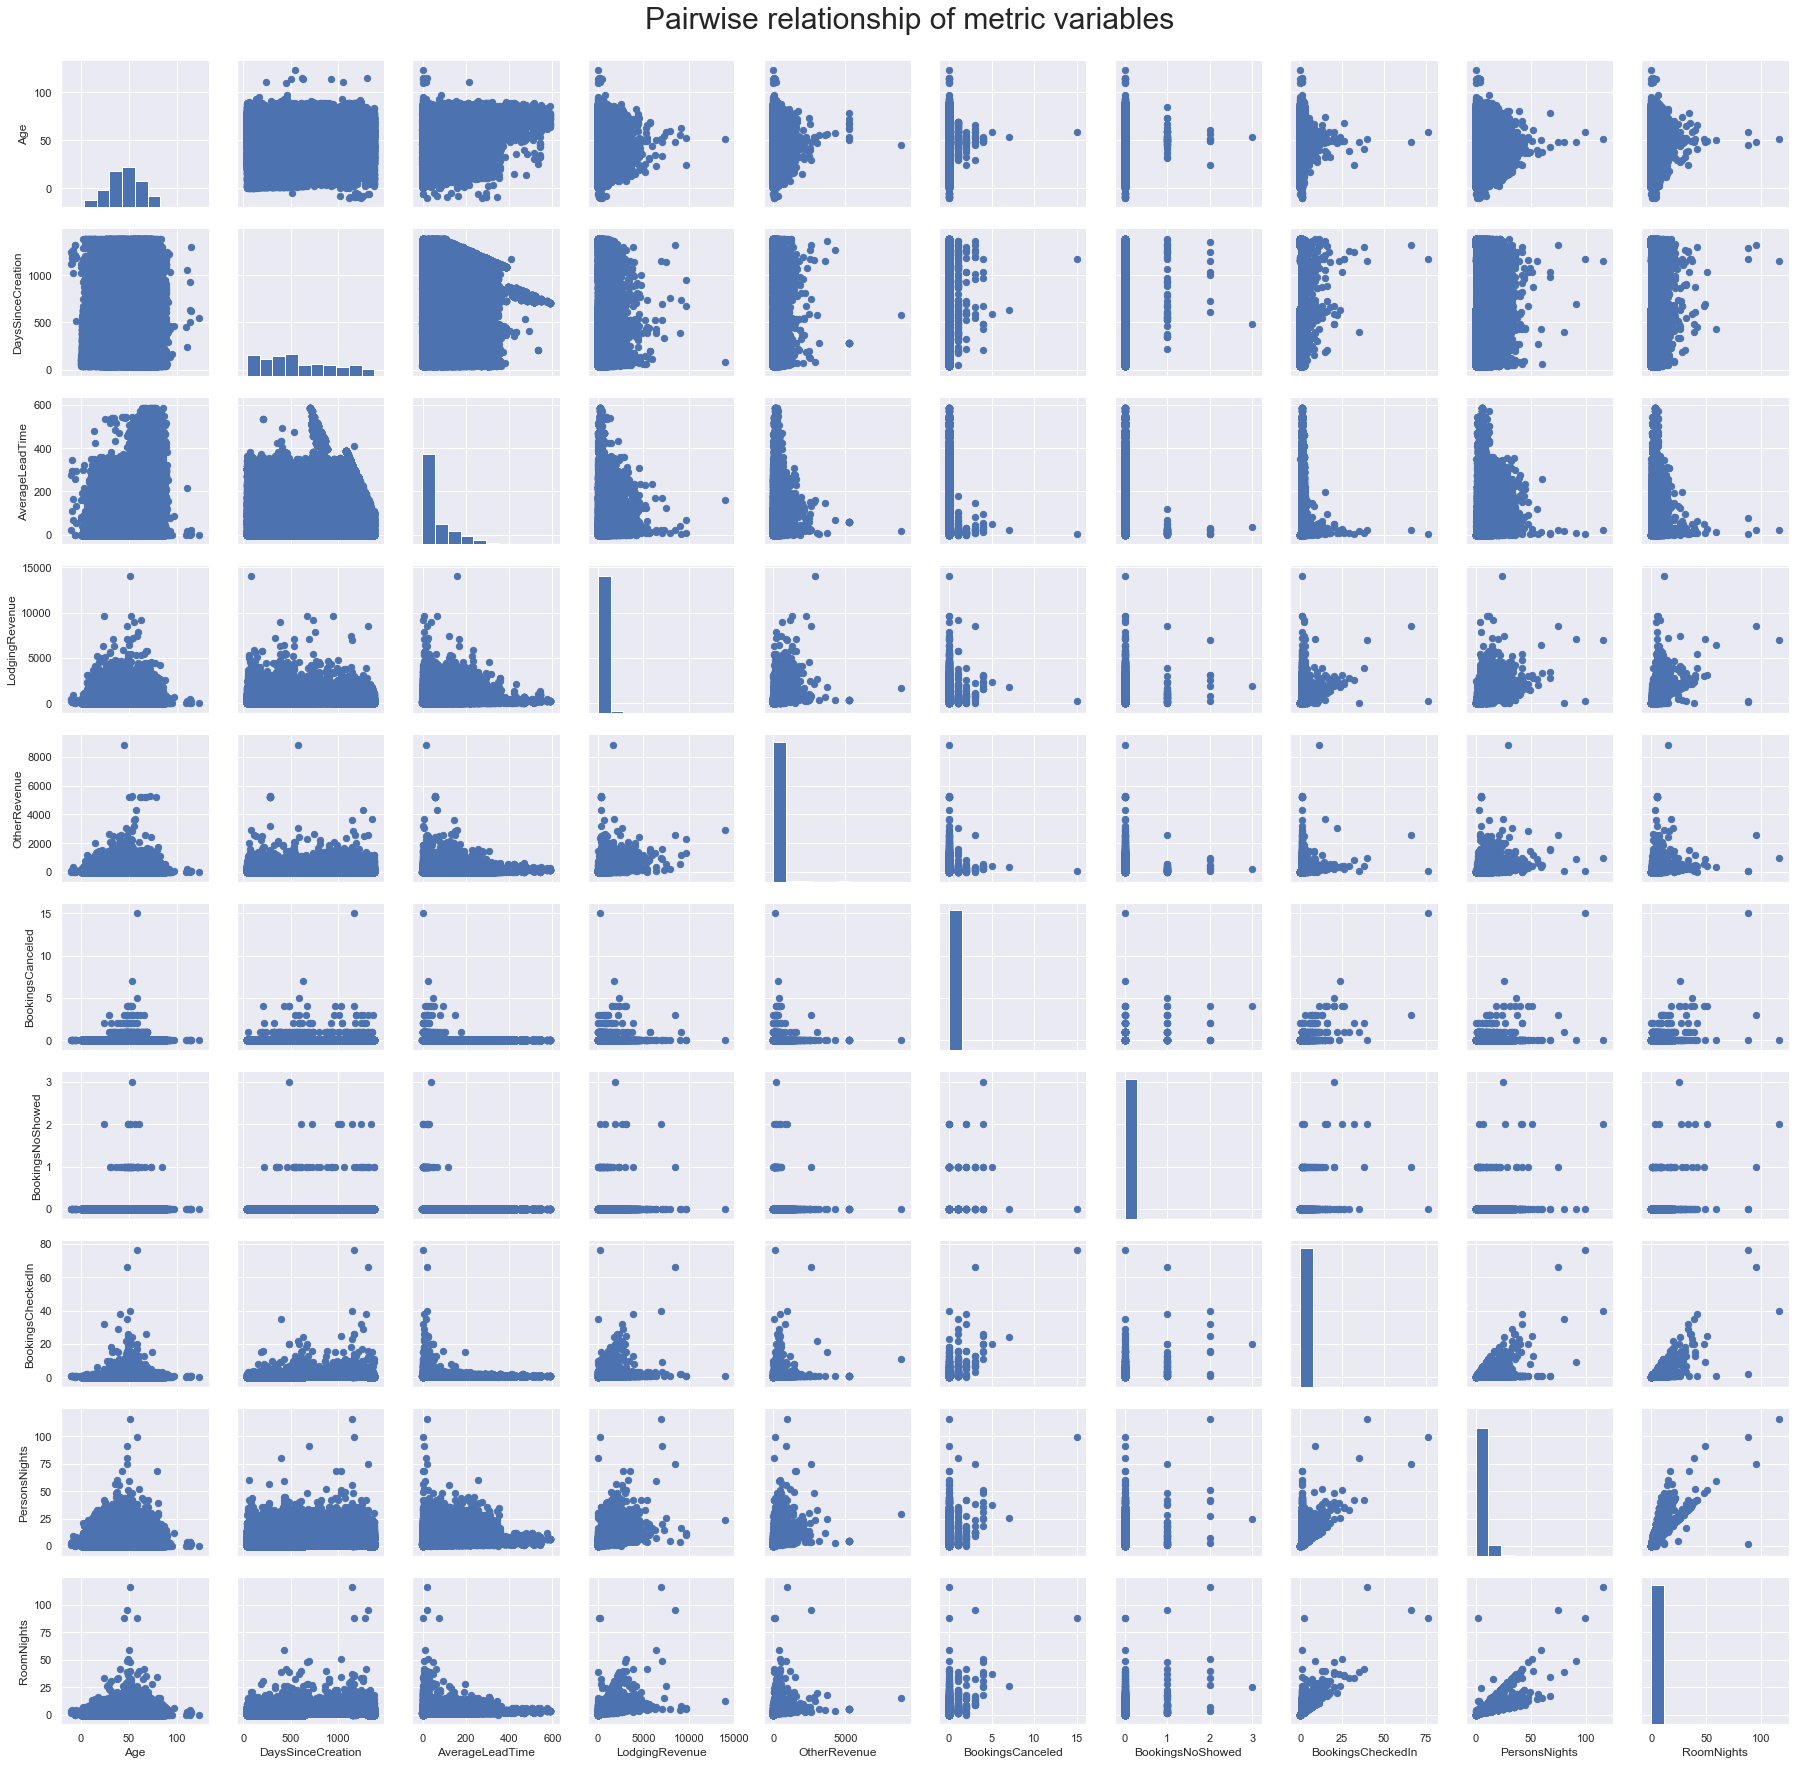

In [32]:


sns.set()

# Setting pairgrid
g = sns.PairGrid(metric_df.drop("ID",1).dropna())

# Populating pairgrid
mdg = g.map_diag(plt.hist)#, edgecolor="w")
mog = g.map_offdiag(plt.scatter, s=40)#, edgecolor="w"
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)

plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


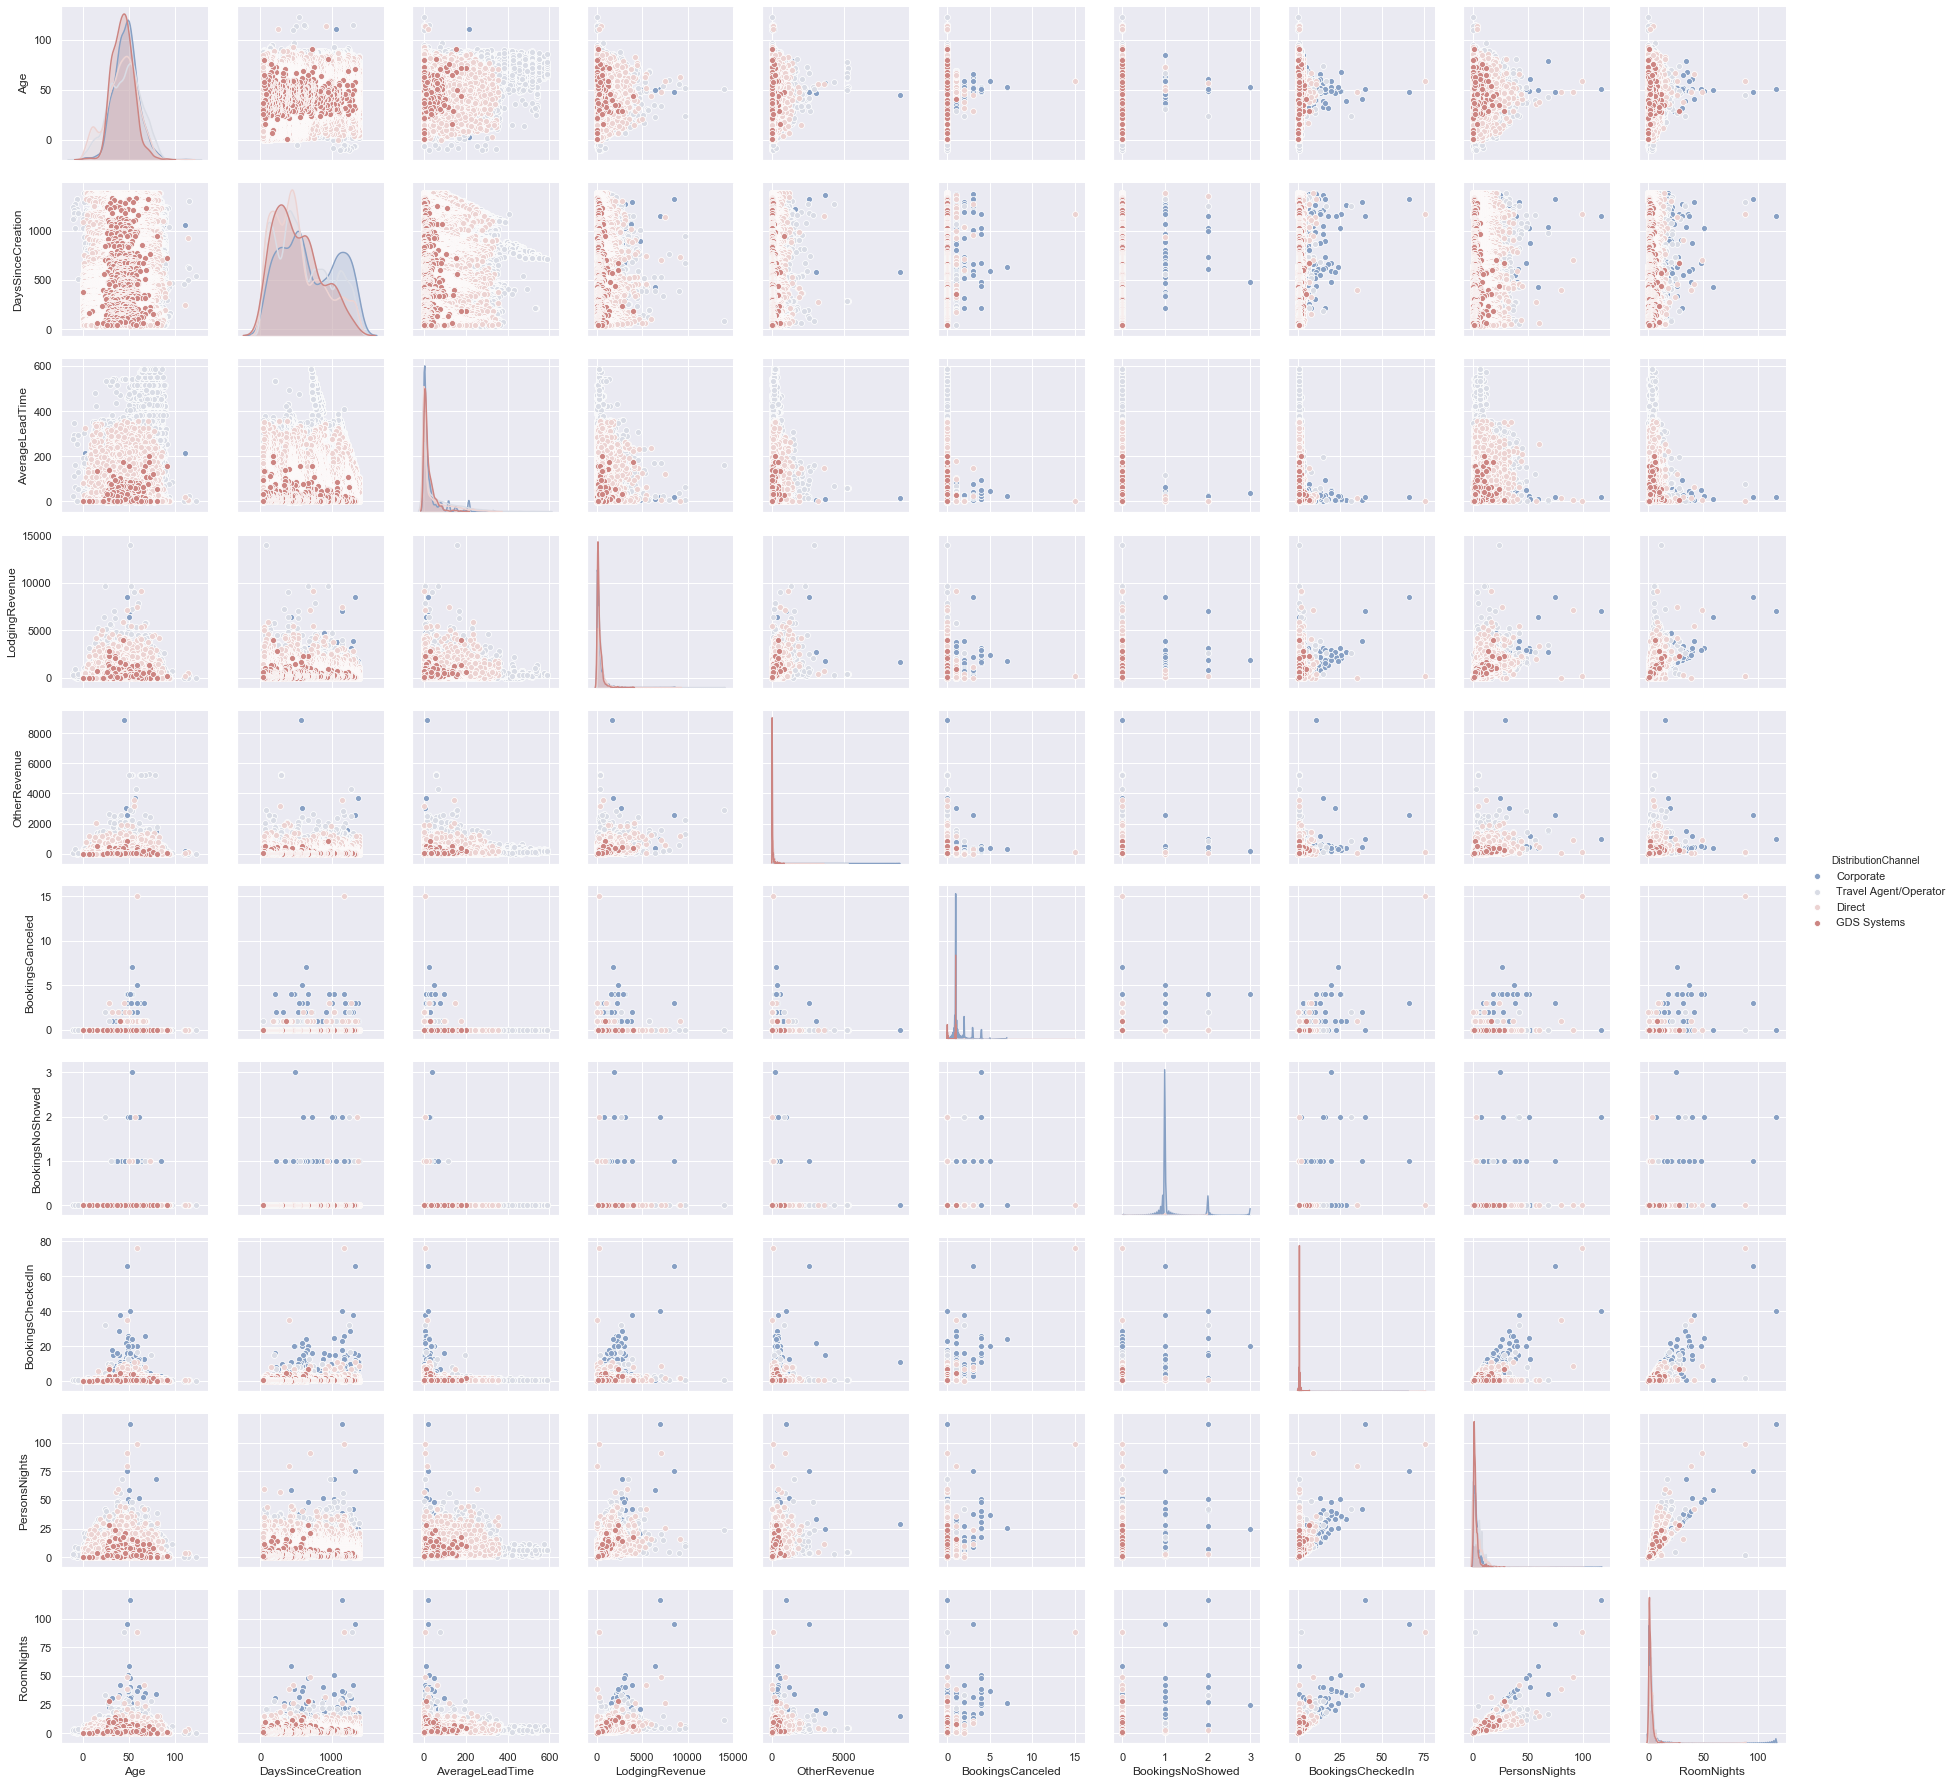

In [54]:

sns.pairplot(metric_df_hue,kind="scatter", hue="DistributionChannel", palette="vlag")
plt.show()

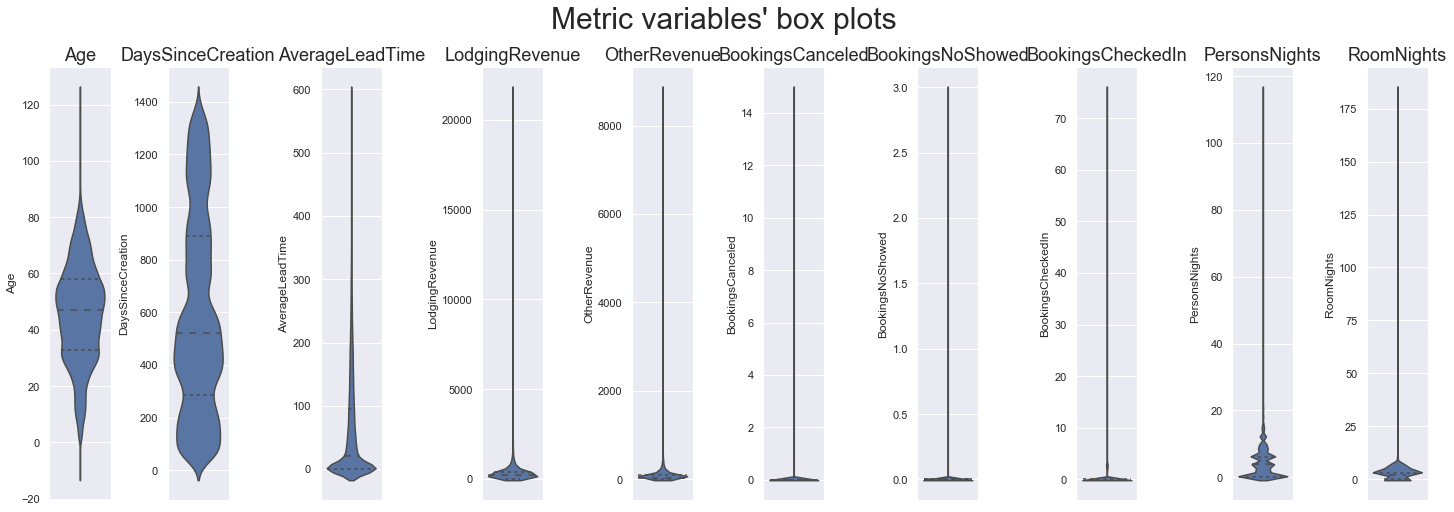

In [47]:
sns.set()

# Features to plot
plot_features = metric_df.columns.drop("ID")

# Prepare figure
fig, axes = plt.subplots(1, len(plot_features), figsize=(20,7), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes, plot_features):
    sns.violinplot(y=f, data=metric_df, ax=ax, inner="quartile")
    ax.set_title(str(f), fontsize=18)

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

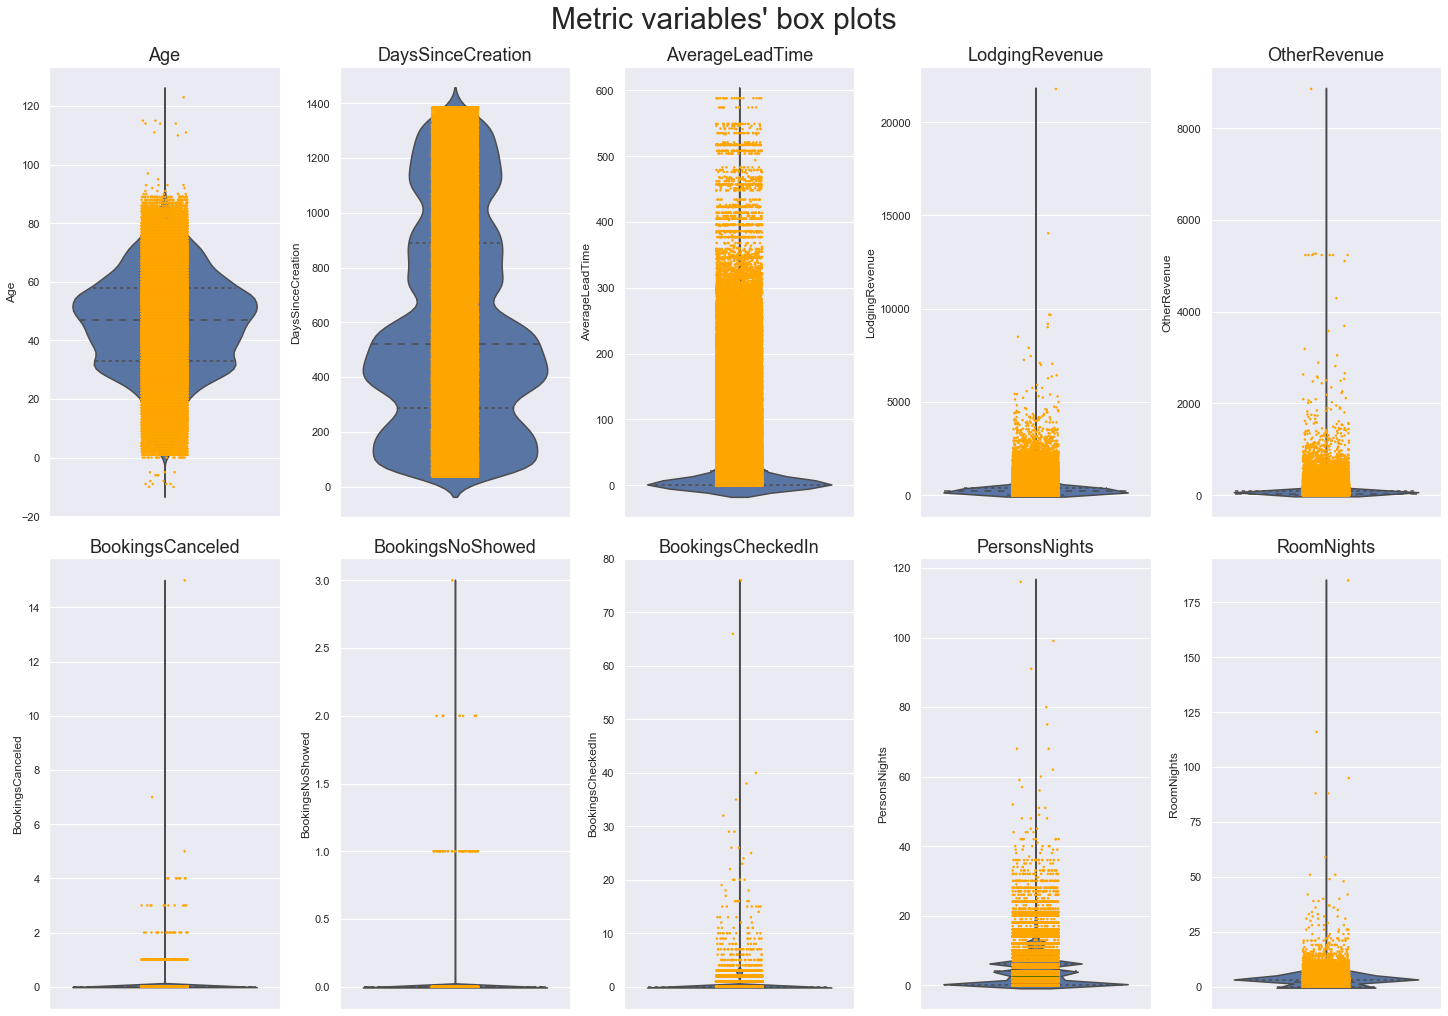

In [52]:
sns.set()

# Features to plot
plot_features = metric_df.columns.drop("ID")

# Prepare figure
fig, axes = plt.subplots(nrows=2,ncols=5, figsize=(20,14), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, plot_features):
    sns.violinplot(y=f, data=metric_df, ax=ax, inner="quartile")
    sns.stripplot(y=f, data=metric_df, ax=ax, color="orange", jitter=0.1,size=2.5)
    ax.set_title(str(f), fontsize=18)

# Layout
plt.suptitle("Metric variables' box plots", fontsize=30)

plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


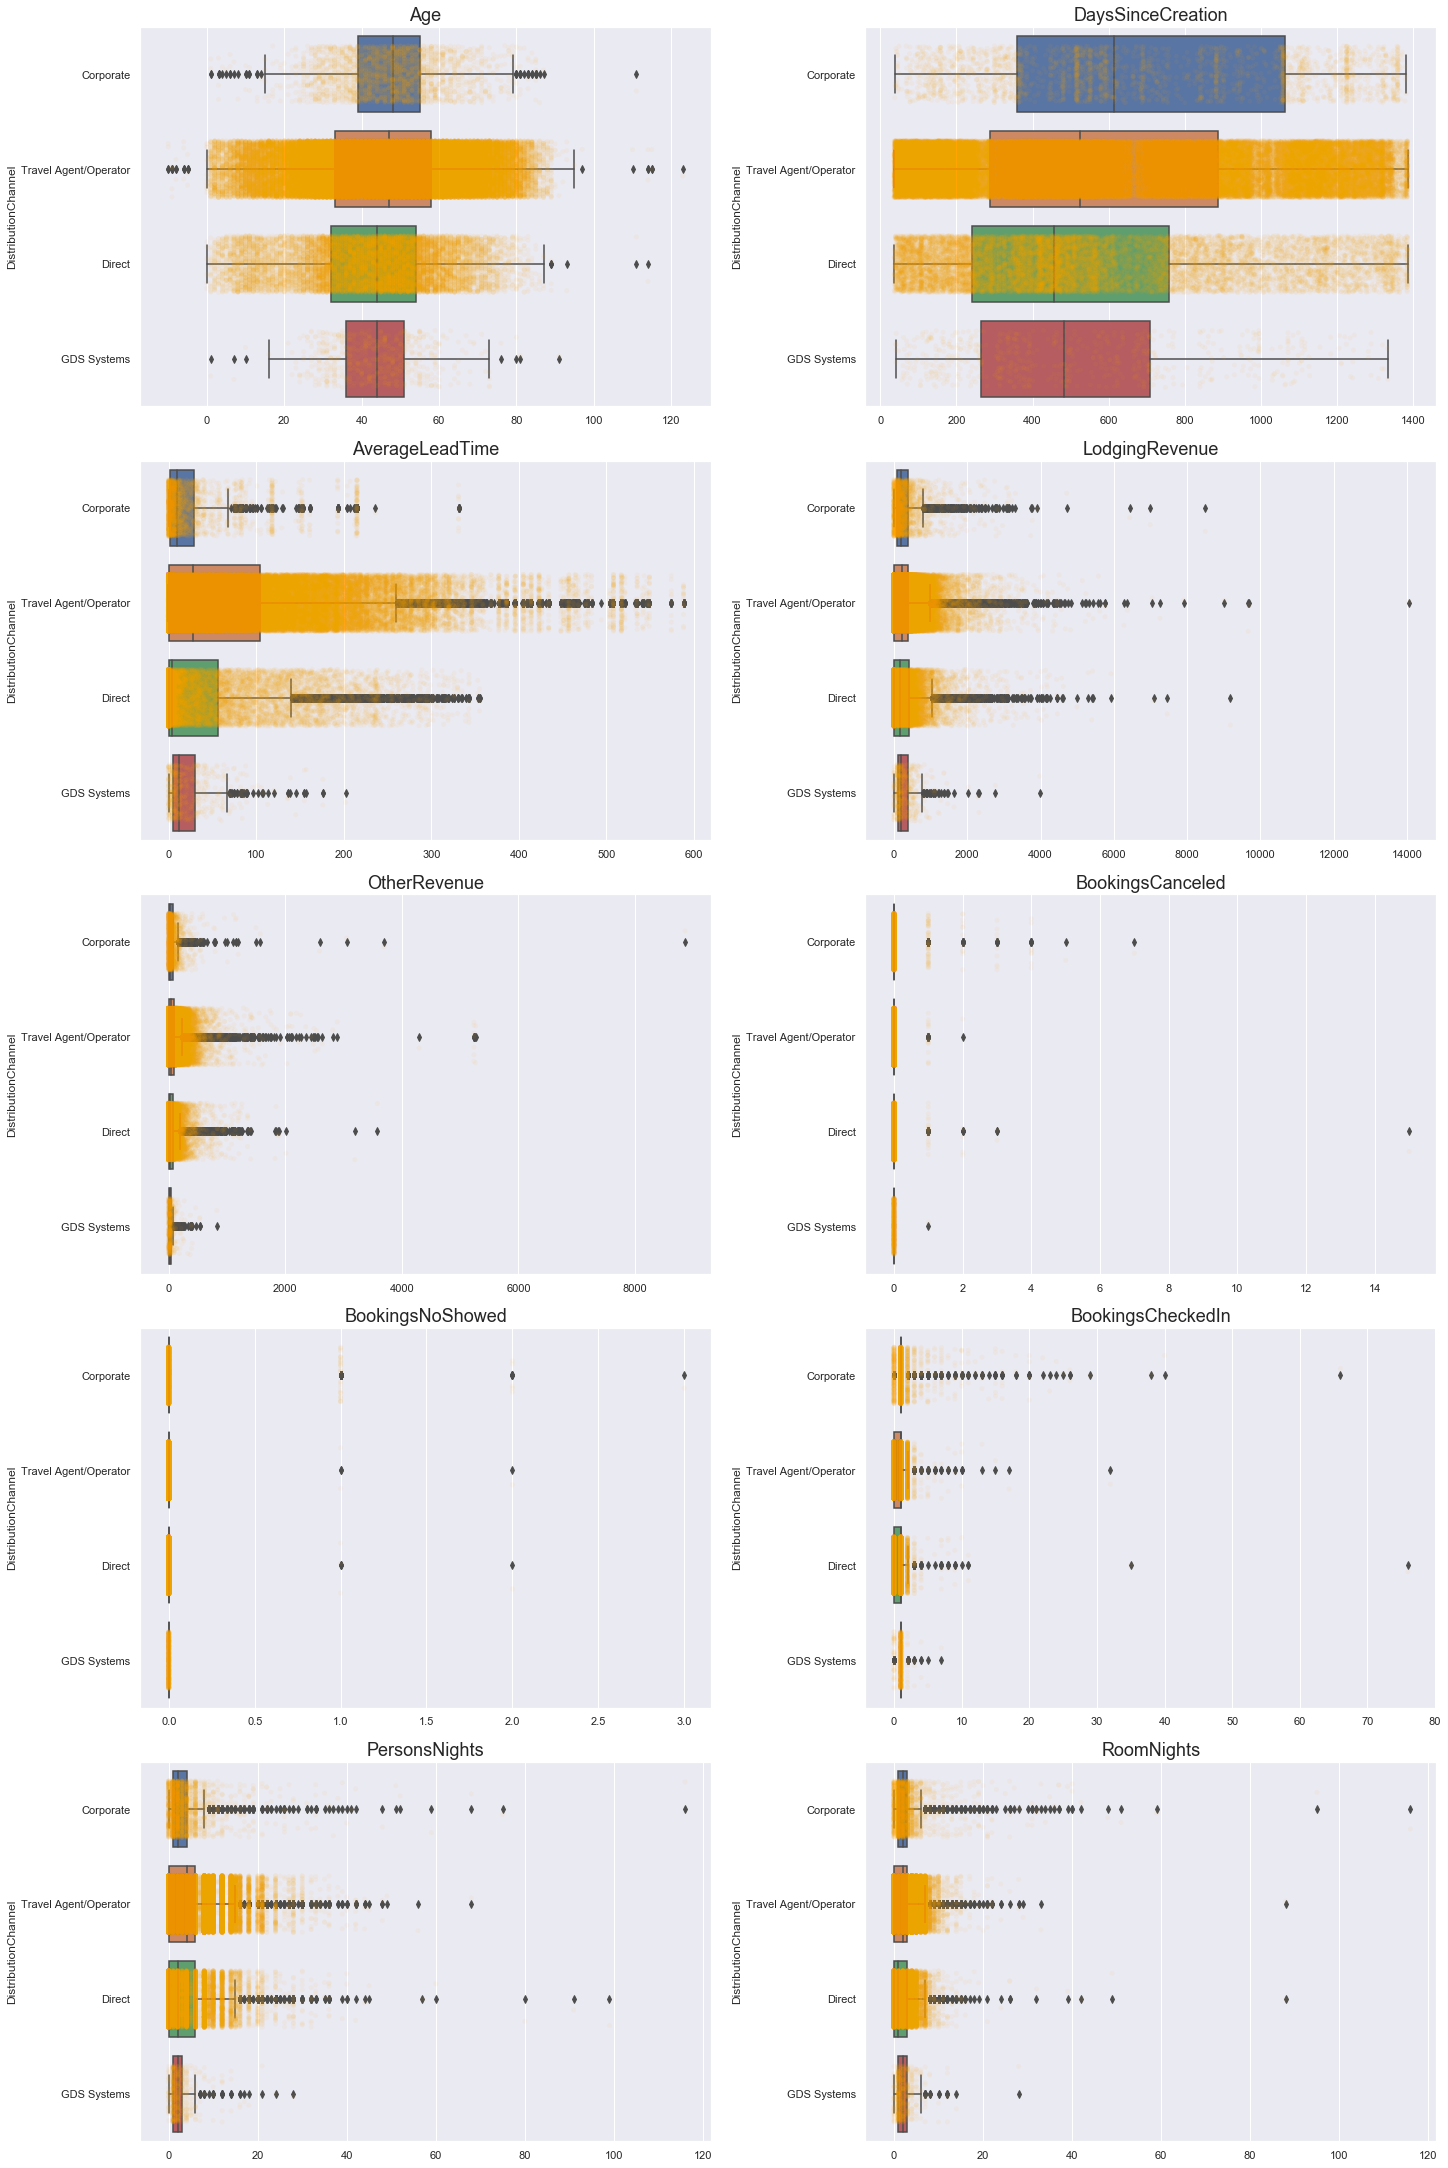

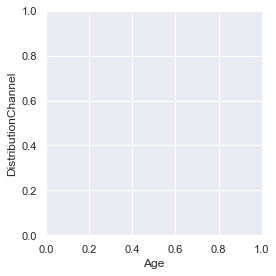

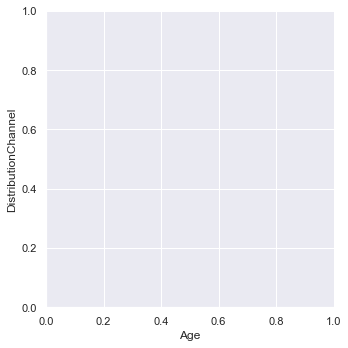

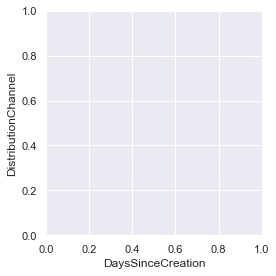

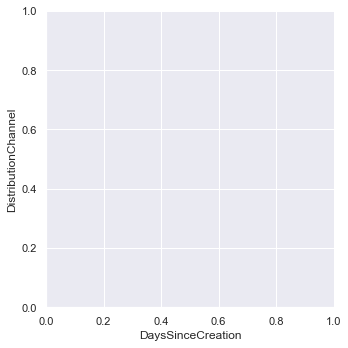

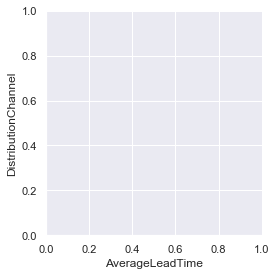

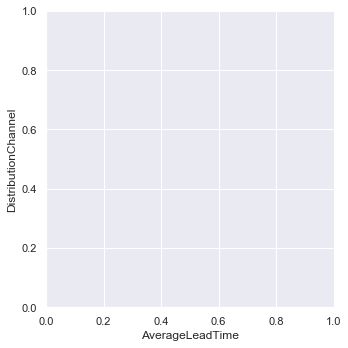

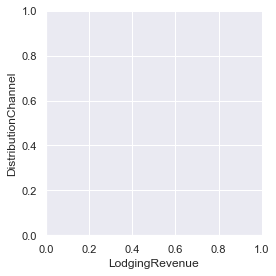

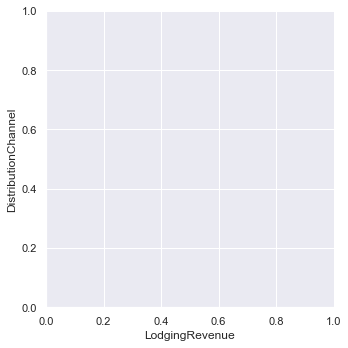

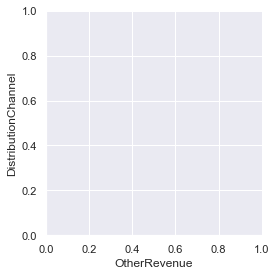

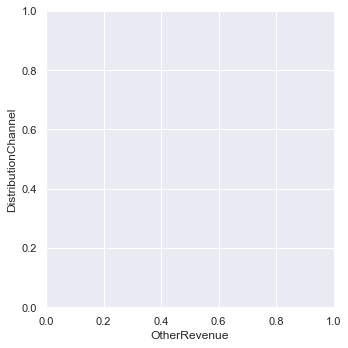

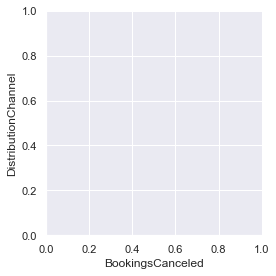

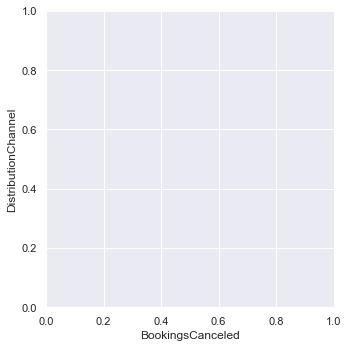

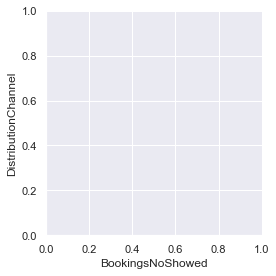

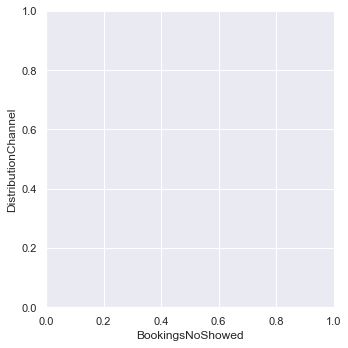

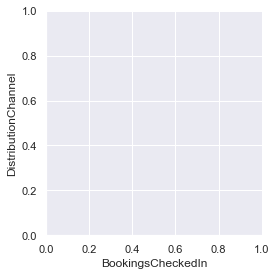

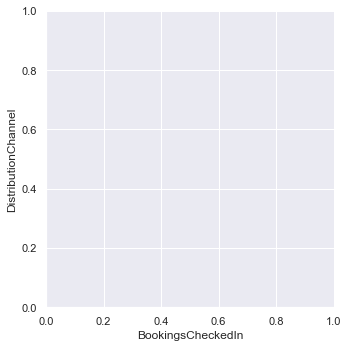

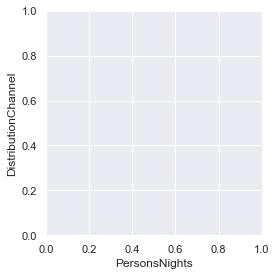

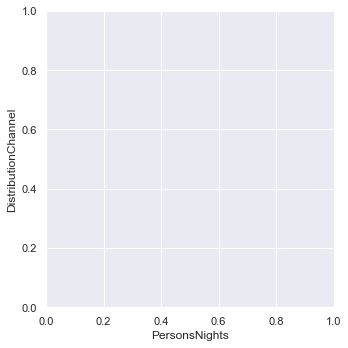

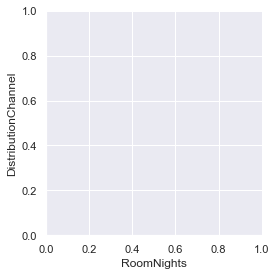

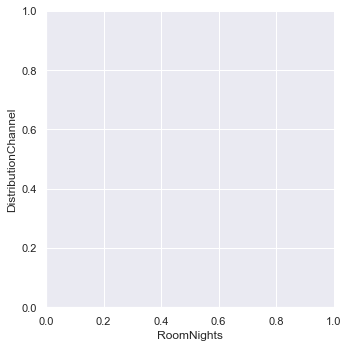

In [75]:

sns.set()

# Features to plot

plot_features = metric_df.columns.drop("ID")
#plot_features = metric_pairplot

# Prepare figure
#fig, axes = plt.subplots(1, len(plot_features), figsize=(20,14), constrained_layout=True)
fig, axes = plt.subplots(nrows=5,ncols=2, figsize=(20,30), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, plot_features):
    #sns.stripplot(x=f, data=metric_df_hue, ax=ax, hue="DistributionChannel", palette="vlag",dodge=True, jitter=0.1,size=2.5)
    #sns.stripplot(x=f, data=metric_df, ax=ax, color="orange", jitter=0.75,size=4,edgecolor="gray",alpha=.05)
    
    sns.catplot(x=f, y="DistributionChannel", data=metric_df_hue, ax=ax, color="orange", jitter=0.3,height=4,edgecolor="gray",alpha=.05)
    
    #sns.boxplot(x=f, data=metric_df, ax=ax)
    sns.catplot(x=f,y="DistributionChannel" ,kind="box",data=metric_df_hue, ax=ax)
    ax.set_title(str(f), fontsize=18)
    ax.set(xlabel="")

# Layout

plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


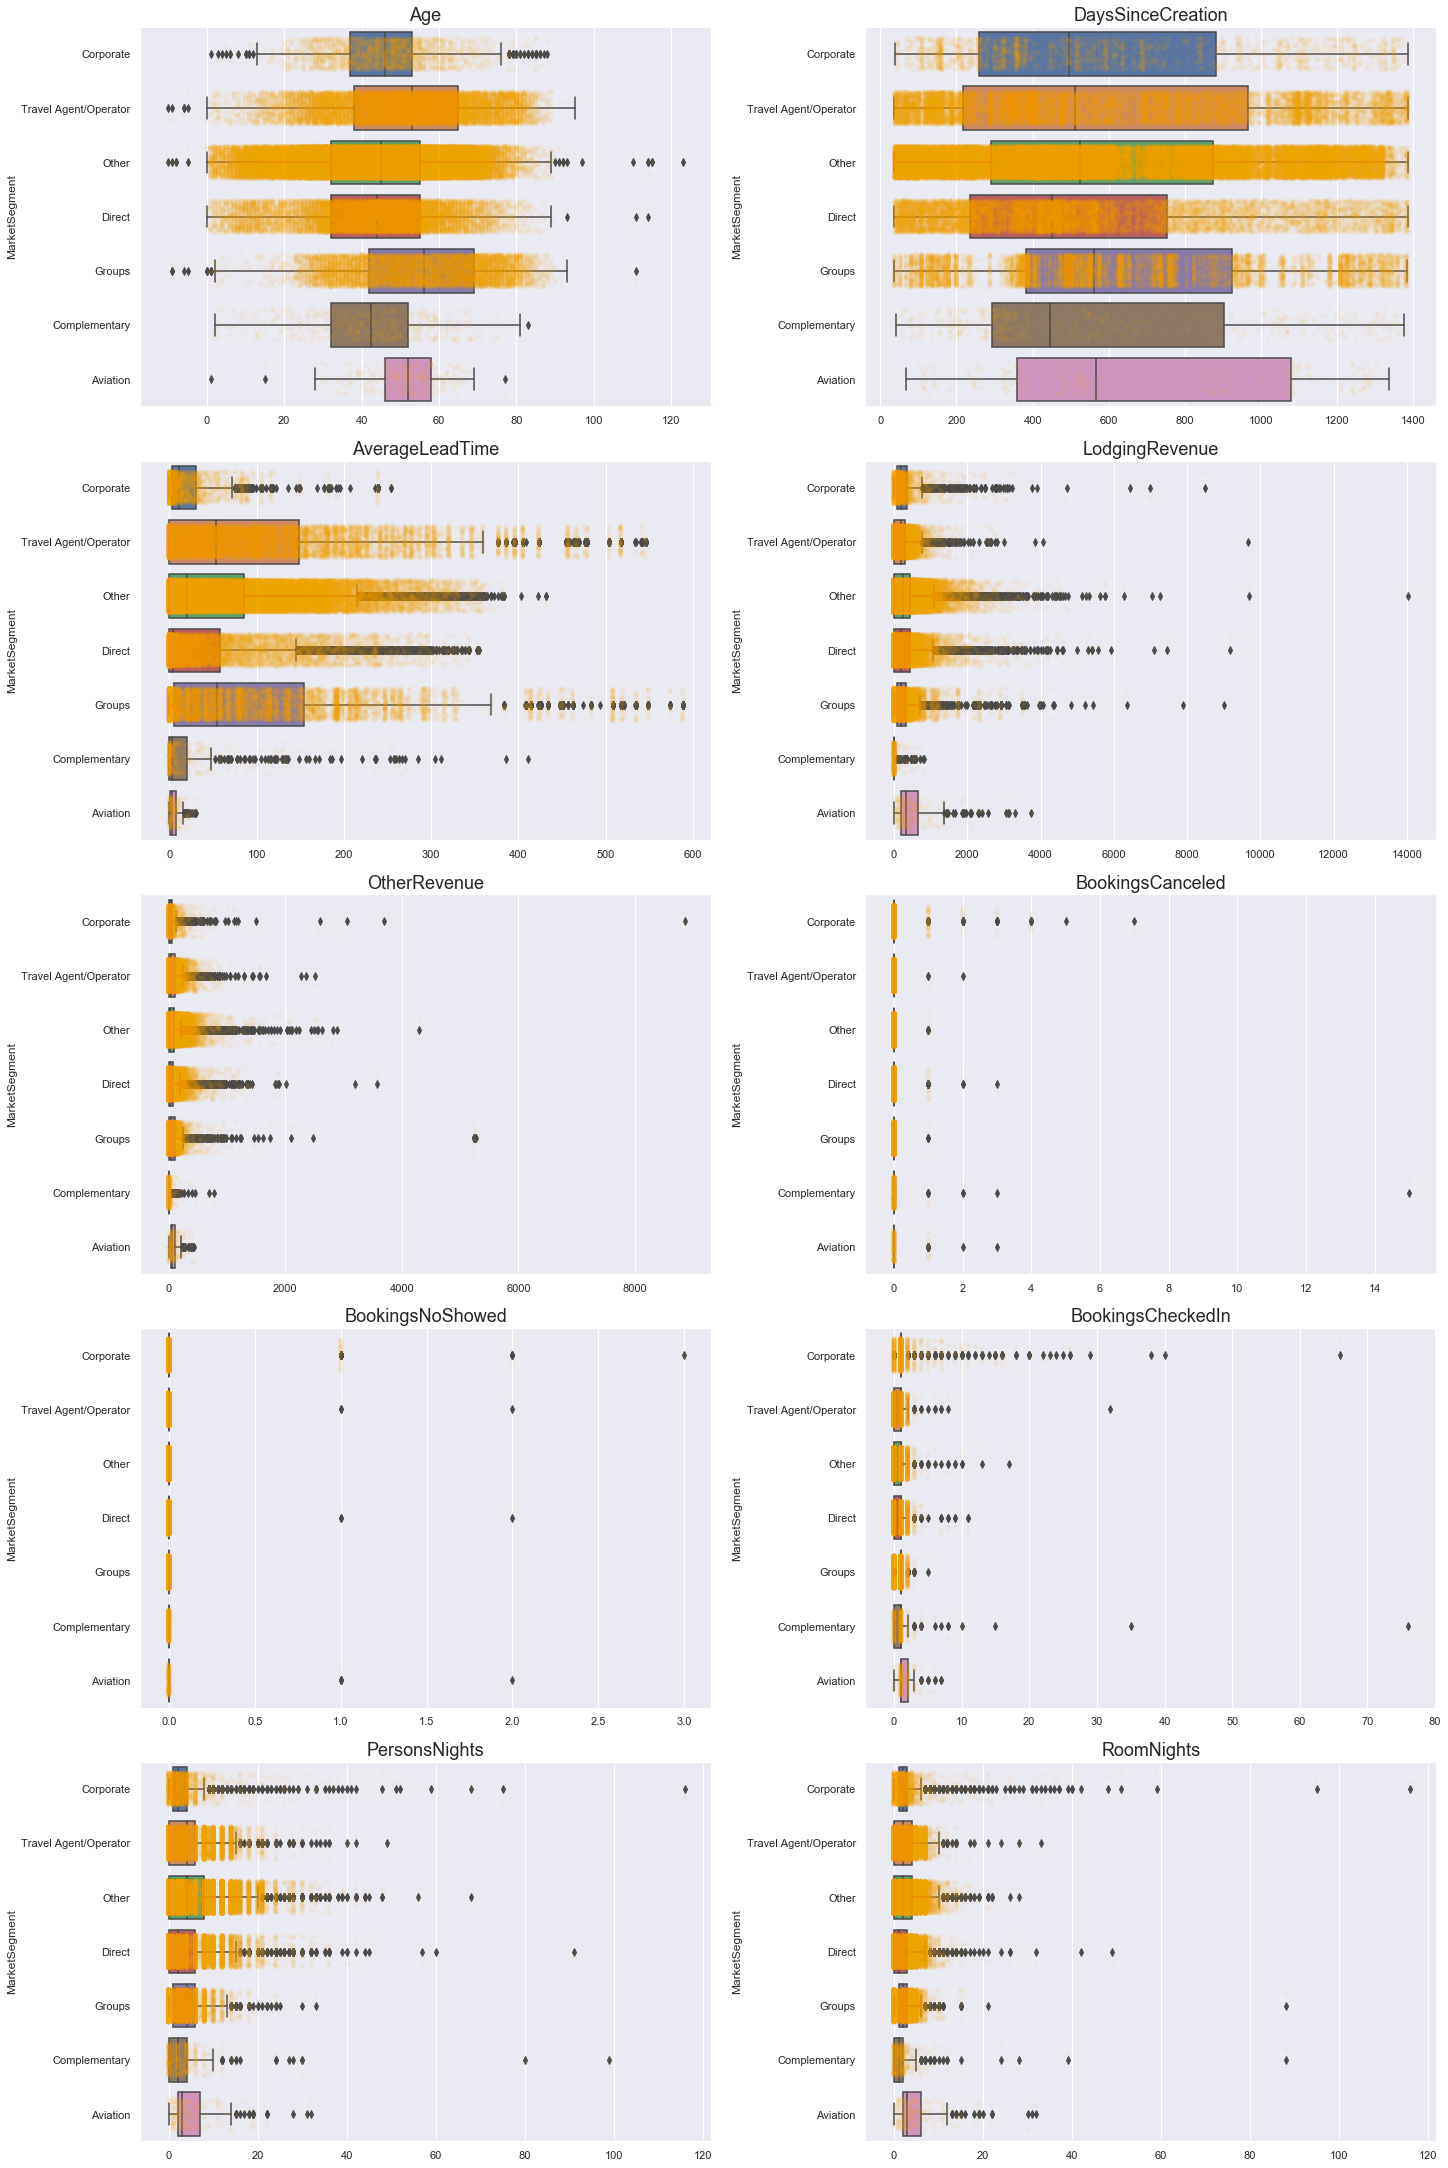

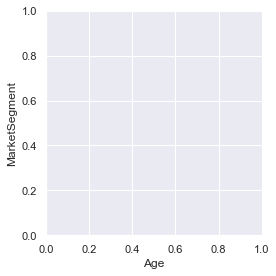

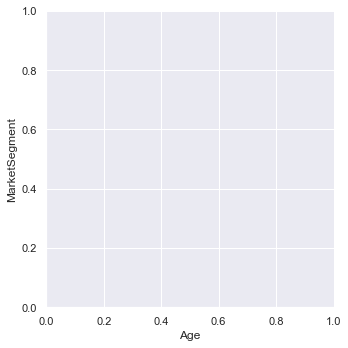

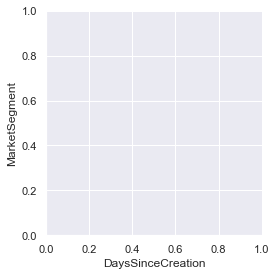

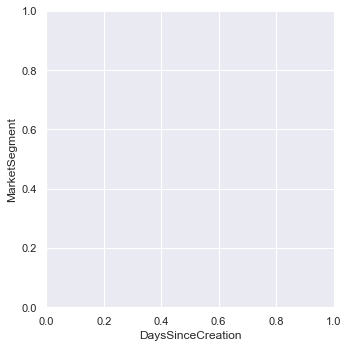

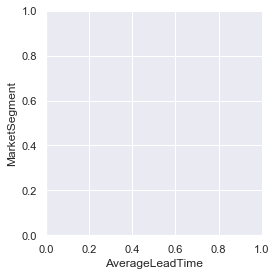

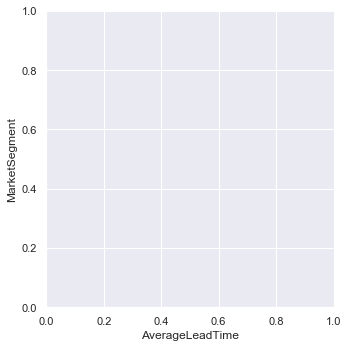

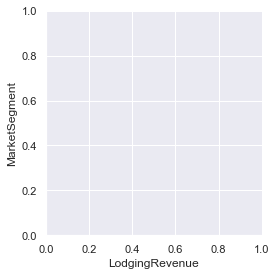

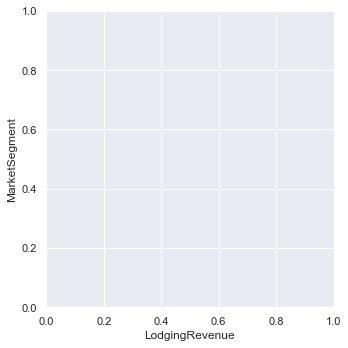

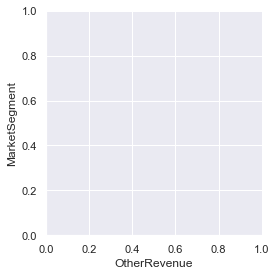

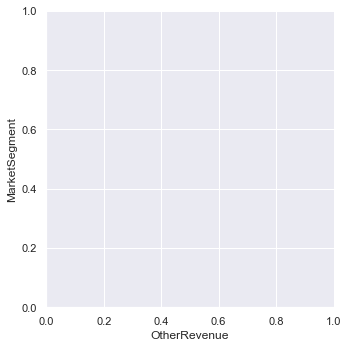

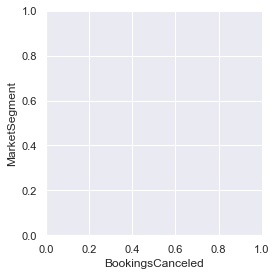

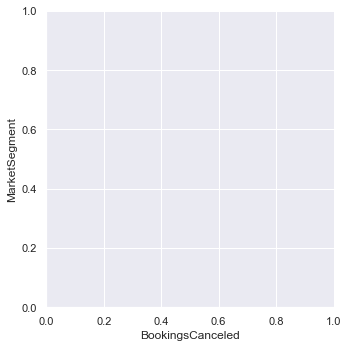

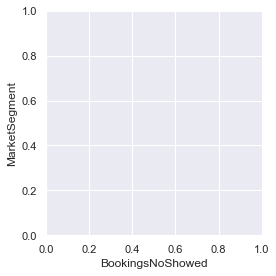

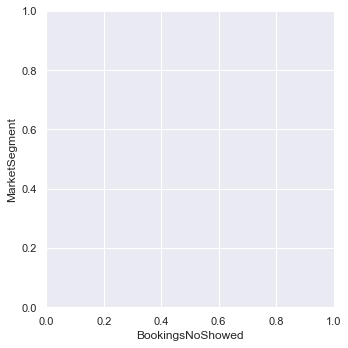

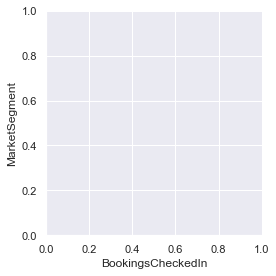

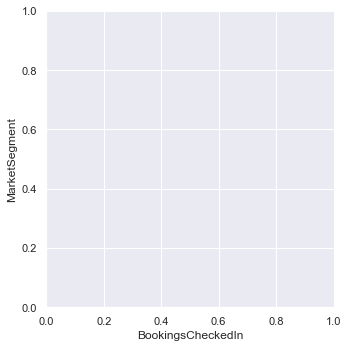

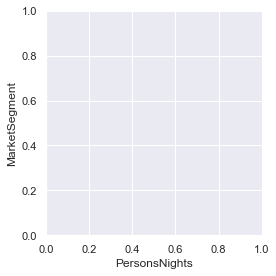

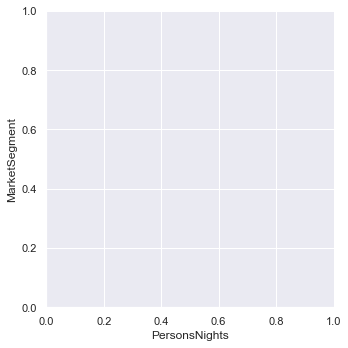

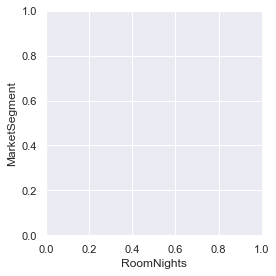

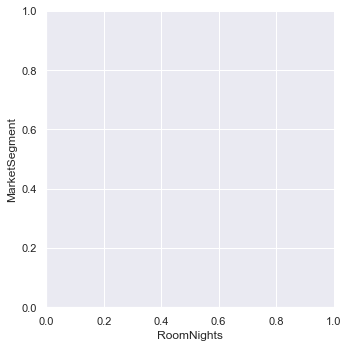

In [78]:

sns.set()

# Features to plot

plot_features = metric_df.columns.drop("ID")
#plot_features = metric_pairplot

# Prepare figure
#fig, axes = plt.subplots(1, len(plot_features), figsize=(20,14), constrained_layout=True)
fig, axes = plt.subplots(nrows=5,ncols=2, figsize=(20,30), constrained_layout=True)
    
# Plot data
for ax, f in zip(axes.flat, plot_features):
    #sns.stripplot(x=f, data=metric_df_hue, ax=ax, hue="DistributionChannel", palette="vlag",dodge=True, jitter=0.1,size=2.5)
    #sns.stripplot(x=f, data=metric_df, ax=ax, color="orange", jitter=0.75,size=4,edgecolor="gray",alpha=.05)
    
    sns.catplot(x=f, y="MarketSegment", data=metric_df_hue, ax=ax, color="orange", jitter=0.3,height=4,edgecolor="gray",alpha=.05)
    
    #sns.boxplot(x=f, data=metric_df, ax=ax)
    sns.catplot(x=f,y="MarketSegment" ,kind="box",data=metric_df_hue, ax=ax)
    ax.set_title(str(f), fontsize=18)
    ax.set(xlabel="")

# Layout

plt.show()

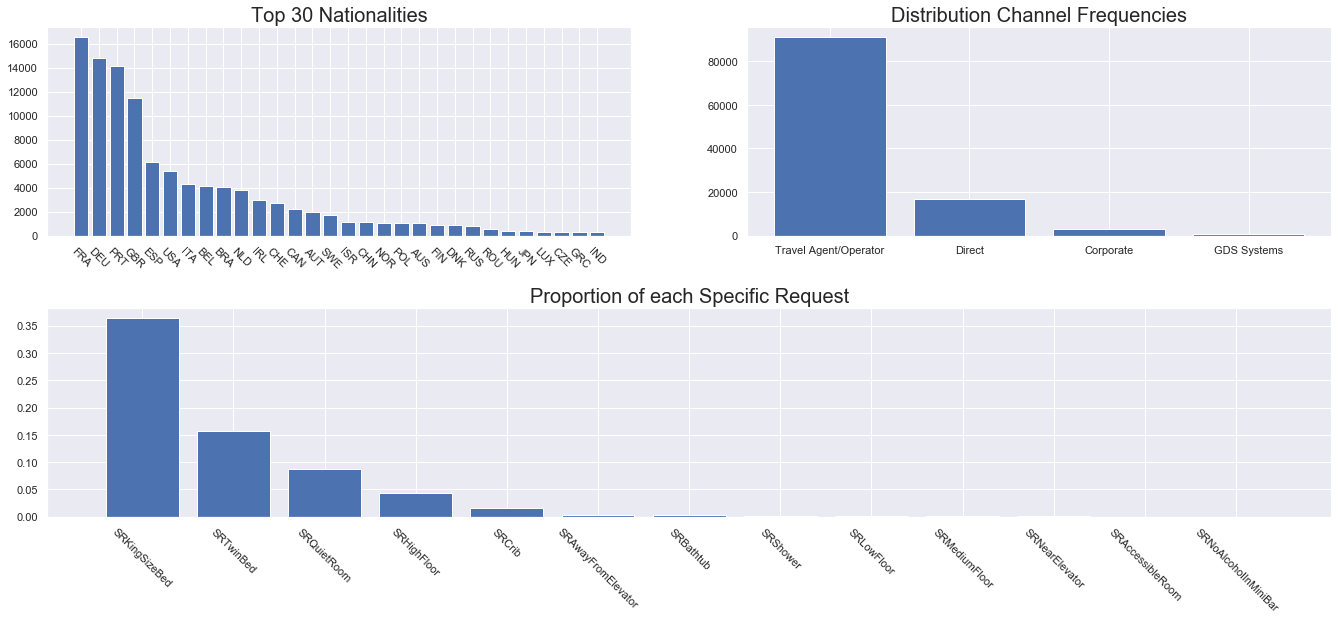

In [8]:
# data
ax1_df = df["Nationality"].value_counts()[:30]
ax2_df = df["DistributionChannel"].value_counts()
ax3_df = pd.melt(df.loc[:,df.columns.str.contains("SR")]).groupby("variable").mean().sort_values("value", ascending=False)["value"]

sns.set()

# figure
fig = plt.figure(figsize=(23,9))
gs = gspec.GridSpec(2,2) # grid specification
ax1 = fig.add_subplot(gs[0,0]) # First row, first column
ax2 = fig.add_subplot(gs[0,1]) # First row, second column
ax3 = fig.add_subplot(gs[1,:]) # Second row, all columns

# axis
ax1.bar(ax1_df.index, ax1_df.values)
ax2.bar(ax2_df.index, ax2_df.values)
ax3.bar(ax3_df.index, ax3_df.values)

# layout
ax1.set_title("Top 30 Nationalities", fontsize=20)
ax2.set_title("Distribution Channel Frequencies", fontsize=20)
ax3.set_title("Proportion of each Specific Request", fontsize=20)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)
for tick in ax3.get_xticklabels():
    tick.set_rotation(-45)
plt.subplots_adjust(hspace=0.35)

plt.show()

In [9]:
df["MarketSegment"].value_counts()

Other                    63680
Direct                   16363
Travel Agent/Operator    16353
Groups                   11461
Corporate                 2931
Complementary              657
Aviation                   288
Name: MarketSegment, dtype: int64

In [10]:
df["NameHash"].value_counts()

0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51EF134B078B9D61A8CC4A    75
0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC9AA009C2BD78D31BBB63    30
0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F    21
0xD32FF3D74C193EF22762853A9F3DFAE05172A9537CCA78A8D519372EB35BB910    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD50    15
                                                                      ..
0x5B67DF276DAB4068E10C08D4AA27904F0219F8F76FA10CB34BC571C8CB2BF917     1
0x1F5E0C5F3A9023D0B43CAA3E409D11DF2229F9BC85EA33F4DFD9BE8D64AF98C2     1
0x407074CAF0AC1165567105DBF27396A1FFBDD1B4A2C5B93BC17876E790B17F19     1
0xE9F219F2040CF9D14B73DCD919CEB534215137D0B2724B5038F7829147CAE9C0     1
0x03E405E5283D75C8DB689B5E5522CF5F80DFC8474DEF6C821F76E4156D5CF0F1     1
Name: NameHash, Length: 107584, dtype: int64

In [11]:
df["DocIDHash"].value_counts()

0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3032
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0xE5E22ED89258EC3968BBDC183F9A2464E5E17FA97D90ADFC5EC8AA0154374D57       1
0xFA8633DDCA2281AB63C0A65FEDE4AAD2166AAA96409BAFB55E4361E1A8DCE2B9       1
0xA8C1F4D97CDC7A62EEA275AA7FD87168B1E577EAC2B83287EA78F84BE2683808       1
0x0E863A644E284D5FE1A21D370D9609B7B299C9D043F643CE121A51076717A6BC       1
0xEB8E2BED69F8A3F079A4014F637E8E4F1C16A7171991FD4F5B43DA4392F9DB73       1
Name: DocIDHash, Length: 103480, dtype: int64

In [12]:
(df["NameHash"] + df["DocIDHash"]).value_counts()
# + df["Age"].astype("str") + df["Nationality"] -> include these as well?

0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD500x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52    15
0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552E3F86410B2B9B91A03500x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003    13
0x36BF5A087E8029783FC52501A957412690AA36E271CE20435600825A549093170x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC0248999C782807195BCB    10
0x3F7AC57386BCF3165796D2B67A548552CA0B7D387E744A36A6A446D2E09D1FBD0x6B421376B94F3D1722979458A96DF486DEA0F9290CC05E9699F2762FD0DDA71D    10
                                                                                                                                        ..
0x0A214580982A3EE0C16279612F733F445DFF33CFDE0A55CE709C05C4726C92BB0x558D6DA0FE0DE7937F1FE5F4A02AA4E06508F94C2902313A425EE08CF421D402     1
0x687D444581D9F889B38B9B777

# Data Cleaning

## Coherence Checks

## Outliers

In [38]:
df.loc[df["LodgingRevenue"]>10000,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2756,2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.0,1584.0,1,...,0,0,0,0,0,0,0,0,0,0
105701,105702,DNK,51.0,83,0x9AC9D968FD7FED7A9AF8C5763BCAE6D8CC64882D70E9...,0x2A6FECFD6B318B51F4F36EED34DB84A319E2FDBEFDE6...,160,14044.8,2891.5,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.loc[df["OtherRevenue"]>8000,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
49183,49184,PRT,45.0,577,0xAF273F4668BB4AF794C0098226948A5ADFE6E67A1A34...,0x4980A1CFF4F6AAA5846A3FC49F5EC0ED7C965C989E35...,14,1649.5,8859.25,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df.loc[df["BookingsCanceled"]>10,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
11480,11481,PRT,59.0,1169,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,3,195.75,87.0,15,...,0,0,0,0,1,0,0,0,0,0


In [44]:
df.loc[df["BookingsCheckedIn"]>60,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2159,2160,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.5,3,...,0,0,0,0,1,0,0,0,0,0
11480,11481,PRT,59.0,1169,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,3,195.75,87.0,15,...,0,0,0,0,1,0,0,0,0,0


In [45]:
df.loc[df["RoomNights"]>125,:]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2756,2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.0,1584.0,1,...,0,0,0,0,0,0,0,0,0,0


* Client ID 2757 appears as a potential outlier in both RoomNights and LodgingRevenue.
* Client ID 11481 appears as a potential outlier in both BookingsCheckedIN and BookingsCanceled.

## Missing Values

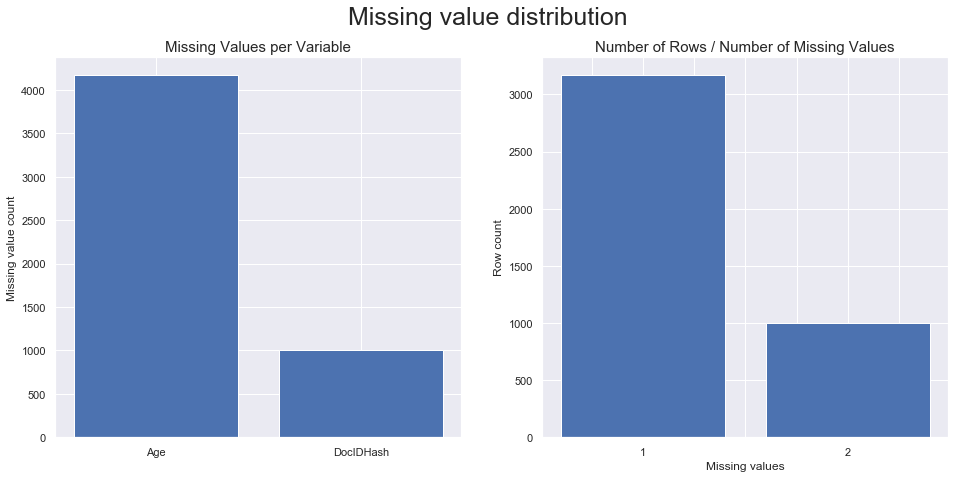

In [35]:
sns.set()

# data
ax1_df = df.isna().sum().sort_values(ascending=False)
ax2_df = df.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index().drop(0, axis=0)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

# axis
ax1.bar(x=ax1_df[ax1_df!=0].index, height=ax1_df[ax1_df!=0])
ax2.bar(x=ax2_df.index, height=ax2_df)

# layout
plt.suptitle("Missing value distribution", fontsize=25)
ax1.set_ylabel("Missing value count")
ax1.set_title("Missing Values per Variable", fontsize=15)
ax2.set_xlabel("Missing values")
ax2.set_ylabel("Row count")
ax2.set_xticklabels(["","",1,"","","",2])
ax2.set_title("Number of Rows / Number of Missing Values", fontsize=15)

plt.show()